# Complete Exploratory Data Analysis

## Georgia Tech MSA Spring 2026 Practicum

This is where your full EDA goes. We look forward to digging deeper into your analysis here.

Read the [eda_outline.md](eda_outline.md) for more details.

# Exploratory Data Analysis (EDA)

**Project focus:** xG-parity matches — identifying positional and tactical patterns that differentiate wins from non-wins when expected goals are similar.

This notebook serves as the comprehensive technical EDA reference. Supporting exploratory work is available in `eda/experiments/`.


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

## Data read in

In [2]:
DATA_DIR = Path("../data")

statsbomb_dir = DATA_DIR / "Statsbomb"
polymarket_dir = DATA_DIR / "Polymarket"

events = pd.read_parquet(statsbomb_dir / "events.parquet")
matches = pd.read_parquet(statsbomb_dir / "matches.parquet")
lineups = pd.read_parquet(statsbomb_dir / "lineups.parquet")

In [3]:
events.shape, matches.shape, lineups.shape

((12188949, 112), (3464, 36), (165820, 17))

In [4]:
display(events.head(3))
display(matches.head(3))
display(lineups.head(3))

,id,index_num,period,minute,second,timestamp,duration,location_x,location_y,possession,possession_team_id,possession_team,out,off_camera,counterpress,under_pressure,type_id,type,match_id,team_id,team,player_id,player,position_id,position,play_pattern_id,play_pattern,shot_end_location_x,shot_end_location_y,shot_end_location_z,shot_statsbomb_xg,shot_outcome,shot_technique,shot_body_part,shot_type,shot_key_pass_id,shot_freeze_frame,shot_first_time,shot_deflected,shot_aerial_won,shot_follows_dribble,shot_one_on_one,shot_open_goal,shot_redirect,shot_saved_off_target,shot_saved_to_post,pass_end_location_x,pass_end_location_y,pass_recipient_id,pass_recipient,...,pass_through_ball,pass_aerial_won,pass_deflected,pass_inswinging,pass_outswinging,pass_no_touch,pass_cut_back,pass_straight,pass_miscommunication,carry_end_location_x,carry_end_location_y,dribble_outcome,dribble_nutmeg,dribble_overrun,dribble_no_touch,duel_type,duel_outcome,foul_committed_card,foul_committed_type,foul_committed_offensive,foul_committed_advantage,foul_committed_penalty,foul_won_defensive,foul_won_advantage,foul_won_penalty,goalkeeper_type,goalkeeper_outcome,goalkeeper_technique,goalkeeper_position,goalkeeper_body_part,goalkeeper_end_location_x,goalkeeper_end_location_y,clearance_body_part,clearance_aerial_won,clearance_head,clearance_left_foot,clearance_right_foot,interception_outcome,block_deflection,block_offensive,block_save_block,ball_recovery_offensive,ball_recovery_failure,miscontrol_aerial_won,substitution_replacement_id,substitution_replacement_name,substitution_outcome,fifty_fifty_outcome,bad_behaviour_card,injury_stoppage_in_chain
0,9f6e2ecf-6685-45df-a62e-c2db3090f6c1,1,1,0,0,00:00:00,0.0,NaN,NaN,1,217,Barcelona,False,False,False,False,35,Starting XI,15946,217,Barcelona,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False
1,0300039d-150d-41e4-b29a-76602ef002e6,2,1,0,0,00:00:00,0.0,NaN,NaN,1,217,Barcelona,False,False,False,False,35,Starting XI,15946,206,Deportivo Alavés,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False
2,491e8901-7630-4cc8-b57b-937dddff2eaa,3,1,0,0,00:00:00,0.0,NaN,NaN,1,217,Barcelona,False,False,False,False,18,Half Start,15946,217,Barcelona,NaN,NaN,NaN,NaN,1,Regular Play,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,False,False,False,NaN,NaN,NaN,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,False


,match_id,match_date,match_week,match_status,match_status_360,kickoff,home_score,away_score,competition_id,competition,competition_stage,season_id,season,home_team_id,home_team,home_managers,away_team_id,away_team,away_managers,stadium_id,stadium,referee_id,referee,last_updated,last_updated_360,data_version,shot_fidelity_version,xy_fidelity_version,competition_name,gender,is_youth,is_international,country_name,season_name,match_updated,match_available_360
0,9880,2018-04-14,32,available,scheduled,16:15:00,2,1,11,La Liga,Regular Season,1,2017/2018,217,Barcelona,"[{""id"":227,""name"":""Ernesto Valverde Tejedor"",""...",207,Valencia,"[{""id"":211,""name"":""Marcelino García Toral"",""ni...",342.0,Spotify Camp Nou,2728.0,Carlos del Cerro Grande,2023-02-08T17:23:53.901920,2021-06-13T16:17:31.694,1.1.0,2,2,La Liga,male,False,False,Spain,2017/2018,2025-07-14T10:01:16.674864,NaN
1,9912,2018-04-29,35,available,scheduled,20:45:00,2,4,11,La Liga,Regular Season,1,2017/2018,219,RC Deportivo La Coruña,"[{""id"":371,""name"":""Clarence Seedorf"",""nickname...",217,Barcelona,"[{""id"":227,""name"":""Ernesto Valverde Tejedor"",""...",4658.0,Estadio Abanca-Riazor,2602.0,Ricardo De Burgos Bengoetxea,2022-12-05T14:42:44.641092,2021-06-13T16:17:31.694,1.1.0,2,2,La Liga,male,False,False,Spain,2017/2018,2025-07-14T10:01:16.674864,NaN
2,9924,2018-05-06,36,available,scheduled,20:45:00,2,2,11,La Liga,Regular Season,1,2017/2018,217,Barcelona,"[{""id"":227,""name"":""Ernesto Valverde Tejedor"",""...",220,Real Madrid,"[{""id"":56,""name"":""Zinédine Zidane"",""nickname"":...",342.0,Spotify Camp Nou,2608.0,Alejandro José Hernández Hernández,2022-12-01T03:25:12.063586,2021-06-13T16:17:31.694,1.1.0,2,2,La Liga,male,False,False,Spain,2017/2018,2025-07-14T10:01:16.674864,NaN


,match_id,team_id,player_id,player_name,player_nickname,jersey_number,country_id,country_name,team_name,position_name,from_time,to_time,from_period,to_period,card_time,card_type,card_reason
0,15946,206,6839,Daniel Alejandro Torres Rojas,Dani Torres,16,49.0,Colombia,Deportivo Alavés,Center Defensive Midfield,00:00,67:48,1.0,2.0,09:15,Yellow Card,Foul Committed
1,15946,206,6855,Guillermo Alfonso Maripán Loaysa,Guillermo Maripán,6,45.0,Chile,Deportivo Alavés,Left Center Back,00:00,NaN,1.0,NaN,40:46,Yellow Card,Bad Behaviour
2,15956,217,5213,Gerard Piqué Bernabéu,Gerard Piqué,3,214.0,Spain,Barcelona,Right Center Back,00:00,NaN,1.0,NaN,59:01,Yellow Card,Foul Committed


## Dataset Overview

This section performs basic integrity checks and high-level exploration of the StatsBomb event and match datasets.


In [5]:
print("Events:", events.shape)
print("Matches:", matches.shape)
print("Lineups:", lineups.shape)

events['match_id'].nunique(), matches['match_id'].nunique()

Events: (12188949, 112)
Matches: (3464, 36)
Lineups: (165820, 17)


(3464, 3464)

In [7]:
(
    events.isna()
    .mean()
    .sort_values(ascending=False)
)

bad_behaviour_card               0.999792
foul_committed_type              0.999522
fifty_fifty_outcome              0.999139
foul_committed_card              0.999050
substitution_outcome             0.998235
substitution_replacement_name    0.998235
substitution_replacement_id      0.998235
goalkeeper_body_part             0.997982
goalkeeper_technique             0.997414
pass_technique                   0.996450
goalkeeper_outcome               0.995917
goalkeeper_end_location_y        0.995350
goalkeeper_end_location_x        0.995350
shot_end_location_z              0.994953
pass_assisted_shot_id            0.994912
shot_key_pass_id                 0.994912
interception_outcome             0.993466
shot_freeze_frame                0.992876
shot_type                        0.992778
shot_technique                   0.992778
shot_outcome                     0.992778
shot_statsbomb_xg                0.992778
shot_end_location_y              0.992778
shot_end_location_x              0

### Missing Data Assessment
The StatsBomb event dataset is highly sparse by design, as most columns are event-conditional.
Fields related to shots, goalkeeper actions, substitutions, disciplinary events, and relational links
(e.g., assisted shots) are only populated when the corresponding event type occurs.

As a result, columns such as `shot_statsbomb_xg`, `goalkeeper_*`, and `substitution_*` exhibit high
missingness due to event rarity rather than data quality issues.

Core identifiers, timestamps, team labels, and possession fields show no missingness, confirming the
structural integrity of the dataset. Spatial fields and player metadata are nearly complete, with
minor missingness attributable to off-camera or administrative events.

No global imputation or row-level filtering is required at this stage; subsequent analyses will
filter by event type and operate only on contextually relevant fields.

## Event-Level Distributions

This section examines the distribution of event types recorded in the StatsBomb dataset to provide
context on which actions dominate match-level data and inform subsequent analytical focus.

In [8]:
event_type_counts = events["type"].value_counts()
event_type_counts.head(15)

type
Pass              3387760
Ball Receipt*     3167310
Carry             2632570
Pressure          1113859
Ball Recovery      366673
Duel               257861
Clearance          158993
Block              132352
Dribble            122047
Goal Keeper        106574
Foul Committed     100510
Miscontrol          99391
Foul Won            95596
Dispossessed        88814
Shot                88023
Name: count, dtype: int64

<Axes: title={'center': 'Most Frequent Event Types in StatsBomb Data'}, xlabel='type'>

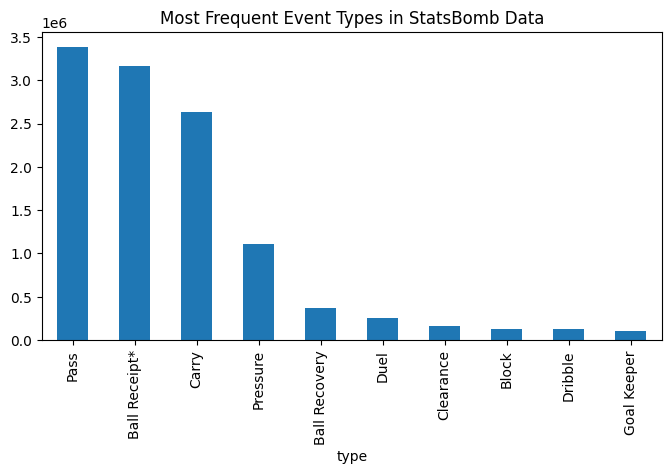

In [9]:
event_type_counts.head(10).plot(
    kind="bar",
    figsize=(8, 4),
    title="Most Frequent Event Types in StatsBomb Data"
)

### Event Type Distribution

Passing, ball receipt, and carrying actions dominate the dataset, reflecting the possession-oriented
nature of event-level soccer data. Together, these three event types account for the vast majority
of recorded actions and form the backbone of most match sequences.

Defensive pressure events occur at a substantially lower frequency but still represent a meaningful
share of total actions, highlighting the importance of off-ball defensive behavior in shaping
possession outcomes. Recovery, duel, clearance, and block events appear less frequently, consistent
with their situational and reactive nature.

Shot events comprise a relatively small fraction of all recorded actions, reinforcing the need to
analyze match outcomes through aggregated patterns of possession, progression, and spatial structure
rather than isolated attacking events alone.

## Shot and Expected Goals (xG) Distributions

This section examines the frequency and distribution of shot events and expected goals (xG) values
to contextualize the rarity and skewness of goal-scoring opportunities.


In [13]:
shots = events[events["type"] == "Shot"]

len(shots), len(events), len(shots) / len(events)

(88023, 12188949, 0.007221541414276161)

In [14]:
shots["shot_statsbomb_xg"].describe()

count    88023.000000
mean         0.106599
std          0.149922
min          0.000180
25%          0.027747
50%          0.054884
75%          0.110167
max          0.995122
Name: shot_statsbomb_xg, dtype: float64

<Axes: title={'center': 'Distribution of Shot xG Values'}, ylabel='Frequency'>

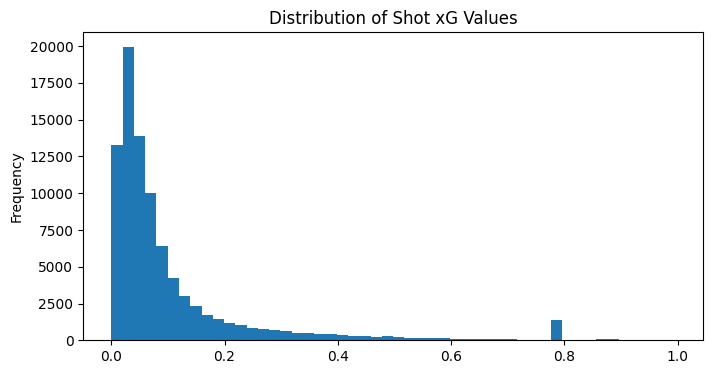

In [15]:
shots["shot_statsbomb_xg"].plot(
    kind="hist",
    bins=50,
    figsize=(8, 4),
    title="Distribution of Shot xG Values"
)

### Key Takeaways from Shot and xG Distributions

Shot events are extremely rare relative to overall match activity, accounting for less than 1% of all
recorded actions. Most shots carry low expected goal values, with a median xG of approximately 0.055
and a heavily right-skewed distribution driven by a small number of high-quality chances.

This structure highlights the inherent variability in goal outcomes and suggests that match results
cannot be fully explained by individual finishing events alone. As a result, analyses that compare
teams with similar total xG but differing outcomes provide a promising framework for uncovering
positional, tactical, and structural factors that influence match results beyond chance quality.


## Explored Analytical Themes

Beyond general dataset characteristics, we explored several analytical themes aimed at identifying
structural and tactical patterns that may influence match outcomes. These themes focus on aggregated
team behaviors rather than isolated events, aligning with the motivation to study matches where
chance quality alone does not explain results.


The primary analytical themes explored include:

- Team-level possession distribution and positional structure
- Spatial concentration and width in possession
- Progression patterns through carries and passes
- Match-level aggregation of these features for outcome comparison

This section summarizes key findings from these explorations, with full derivations and exploratory
work available in the supporting notebooks located in `eda/experiments/`.


### Theme 1: Possession Distribution and Positional Structure

While overall possession volume has limited explanatory power on its own, the *structure* of
possession may provide meaningful insight in matches where teams generate similar expected goals.
In xG-parity matches, where chance quality alone does not separate outcomes, differences in how
teams occupy space and distribute touches across positions may reflect tactical advantages that
translate into winning results.

Accordingly, this theme focuses on the following question:

**In matches where teams produce similar total xG, do winning teams exhibit systematically different
positional possession structures compared to non-winning teams?**

The analyses below summarize exploratory findings that motivate deeper investigation of positional
and spatial structure within xG-parity matches.


To explore this question, possession was decomposed into positional touch shares at the team–match
level. Player positions were mapped into standardized positional groups to reduce noise and improve
interpretability. Touch counts were normalized by total team touches to enable comparison across
matches with varying possession levels.

Full methodological details and exploratory experiments are available in
`eda/experiments/positional_possession_eda_alex.ipynb`.


### Defining Match-Level xG and Outcome Context

To connect positional and possession-based analysis to match outcomes, we first construct match-level
expected goals (xG) totals for each team and associate these totals with observed match results.
This provides the foundation for identifying matches in which teams generate similar chance quality
but experience different outcomes.


In [17]:
shots = events[events["type"] == "Shot"].copy()

In [18]:
team_match_xg = (
    shots
    .groupby(["match_id", "team"])
    .agg(
        total_xg=("shot_statsbomb_xg", "sum"),
        shots=("id", "count")
    )
    .reset_index()
)

In [19]:
team_match_xg.head()

,match_id,team,total_xg,shots
0,7298,Chelsea FCW,2.972968,25
1,7298,Manchester City WFC,1.107514,9
2,7430,North Carolina Courage,2.152028,17
3,7430,Washington Spirit,0.948216,8
4,7443,OL Reign,1.857566,13


In [20]:
match_outcomes = matches[
    ["match_id", "home_team", "away_team", "home_score", "away_score"]
].copy()

# Home team outcome
home_outcomes = match_outcomes.assign(
    team=match_outcomes["home_team"],
    goals_for=match_outcomes["home_score"],
    goals_against=match_outcomes["away_score"]
)

# Away team outcome
away_outcomes = match_outcomes.assign(
    team=match_outcomes["away_team"],
    goals_for=match_outcomes["away_score"],
    goals_against=match_outcomes["home_score"]
)

team_outcomes = pd.concat([home_outcomes, away_outcomes], ignore_index=True)

team_outcomes["outcome"] = np.where(
    team_outcomes["goals_for"] > team_outcomes["goals_against"], "Win",
    np.where(
        team_outcomes["goals_for"] < team_outcomes["goals_against"], "Loss",
        "Draw"
    )
)

team_outcomes = team_outcomes[["match_id", "team", "outcome"]]
team_outcomes.head()

,match_id,team,outcome
0,9880,Barcelona,Win
1,9912,RC Deportivo La Coruña,Loss
2,9924,Barcelona,Draw
3,9855,Barcelona,Win
4,9827,Las Palmas,Draw


In [21]:
team_match_xg = team_match_xg.merge(
    team_outcomes,
    on=["match_id", "team"],
    how="left"
)
team_match_xg.head()

,match_id,team,total_xg,shots,outcome
0,7298,Chelsea FCW,2.972968,25,Draw
1,7298,Manchester City WFC,1.107514,9,Draw
2,7430,North Carolina Courage,2.152028,17,Win
3,7430,Washington Spirit,0.948216,8,Loss
4,7443,OL Reign,1.857566,13,Win


In [22]:
team_match_xg[team_match_xg['match_id']==7298]

,match_id,team,total_xg,shots,outcome
0,7298,Chelsea FCW,2.972968,25,Draw
1,7298,Manchester City WFC,1.107514,9,Draw


In [24]:
team_match_xg["outcome"].value_counts(dropna=False)

outcome
Win     2667
Loss    2660
Draw    1594
Name: count, dtype: int64

In [26]:
xg_pairs = (
    team_match_xg
    .merge(
        team_match_xg,
        on="match_id",
        suffixes=("_team", "_opp")
    )
    .query("team_team != team_opp")
)

xg_pairs["xg_diff"] = (
    xg_pairs["total_xg_team"] - xg_pairs["total_xg_opp"]
).abs()

xg_pairs.head(3)

,match_id,team_team,total_xg_team,shots_team,outcome_team,team_opp,total_xg_opp,shots_opp,outcome_opp,xg_diff
1,7298,Chelsea FCW,2.972968,25,Draw,Manchester City WFC,1.107514,9,Draw,1.865454
2,7298,Manchester City WFC,1.107514,9,Draw,Chelsea FCW,2.972968,25,Draw,1.865454
5,7430,North Carolina Courage,2.152028,17,Win,Washington Spirit,0.948216,8,Loss,1.203812


In [27]:
xg_pairs[xg_pairs['match_id']==7298]

,match_id,team_team,total_xg_team,shots_team,outcome_team,team_opp,total_xg_opp,shots_opp,outcome_opp,xg_diff
1,7298,Chelsea FCW,2.972968,25,Draw,Manchester City WFC,1.107514,9,Draw,1.865454
2,7298,Manchester City WFC,1.107514,9,Draw,Chelsea FCW,2.972968,25,Draw,1.865454


In [28]:
XG_PARITY_THRESHOLD = 0.3

xg_parity = xg_pairs[xg_pairs["xg_diff"] <= XG_PARITY_THRESHOLD]
xg_parity

,match_id,team_team,total_xg_team,shots_team,outcome_team,team_opp,total_xg_opp,shots_opp,outcome_opp,xg_diff
69,7480,OL Reign,0.864332,9,Win,Utah Royals,0.861828,11,Loss,0.002504
70,7480,Utah Royals,0.861828,11,Loss,OL Reign,0.864332,9,Win,0.002504
109,7494,Houston Dash,1.131186,16,Loss,Utah Royals,1.236244,9,Win,0.105058
110,7494,Utah Royals,1.236244,9,Win,Houston Dash,1.131186,16,Loss,0.105058
117,7497,Chicago Red Stars,0.940007,12,Draw,North Carolina Courage,1.144564,17,Draw,0.204556
...,...,...,...,...,...,...,...,...,...,...
13785,3998854,Portugal Women's,2.010840,20,Loss,Belgium Women's,2.062541,13,Win,0.051702
13808,4018354,Italy Women's,1.597245,14,Win,Norway Women's,1.895418,10,Loss,0.298173
13809,4018354,Norway Women's,1.895418,10,Loss,Italy Women's,1.597245,14,Win,0.298173
13812,4018355,England Women's,7.395617,25,Draw,Sweden Women's,7.213724,20,Draw,0.181893


In [31]:
xg_parity['outcome_team'].value_counts(dropna=False)

outcome_team
Win     457
Loss    457
Draw    388
Name: count, dtype: int64

### Sample of xG-Parity Team–Match Observations

The table above shows a sample of team-level observations drawn from matches in which total expected
goals (xG) between opponents differ by at most 0.30. Each match appears twice—once from each team’s
perspective—resulting in a team–match representation rather than a single match-level record.

Despite similar chance quality, outcomes vary across these observations, including wins, losses,
and draws. This confirms the presence of a meaningful subset of matches where xG alone does not
fully explain results, motivating further investigation into positional, possession-based, and
structural factors that may differentiate winning teams from non-winning teams within this subset.


## Possession and Positional Touch Structure in xG-Parity Matches

This section examines how teams distribute possession across positions specifically within
xG-parity matches. By restricting analysis to matches where total expected goals are similar,
we aim to identify whether differences in positional touch structure are associated with
winning outcomes despite comparable chance quality.


The analyses below adapt prior possession-based exploratory work by conditioning on the
xG-parity subset defined above. Touch-based possession metrics are computed at the team–match
level and normalized to allow comparison across matches with varying possession volume.

In [33]:
xg_parity_match_ids = xg_parity["match_id"].unique()

events_parity = events[
    events["match_id"].isin(xg_parity_match_ids)
].copy()
events_parity.shape

(2266270, 112)

In [34]:
events_parity["match_id"].nunique(), len(xg_parity_match_ids)

(651, 651)

In [35]:
len(events_parity), len(events)

(2266270, 12188949)

The xG-parity filter yields 651 matches, representing a substantial subset of the dataset.
These matches account for approximately 2.27 million events, indicating that xG-parity
matches are common enough to support robust exploratory analysis while still representing
a distinct competitive regime.

In [36]:
TOUCH_EVENTS = [
    "Ball Receipt*",
    "Pass",
    "Carry",
    "Dribble",
    "Shot"
]

touches = events_parity[
    events_parity["type"].isin(TOUCH_EVENTS)
].copy()


In [37]:
touches["type"].value_counts()

type
Pass             630179
Ball Receipt*    587345
Carry            481616
Dribble           21907
Shot              15633
Name: count, dtype: int64

In [38]:
touches = touches.dropna(subset=["position"])

In [39]:
len(touches), len(events_parity)

(1736680, 2266270)

In [40]:
touches["position"].value_counts().head(10)

position
Left Center Back            152615
Right Center Back           149657
Right Back                  148593
Left Back                   148244
Center Forward               99743
Left Defensive Midfield      95751
Right Defensive Midfield     93385
Left Center Midfield         92441
Left Wing                    91469
Right Center Midfield        89944
Name: count, dtype: int64

After filtering to touch events with valid positional information, approximately 1.74 million
events remain within xG-parity matches. This represents the majority of touch actions and confirms
that positional metadata coverage is sufficiently complete for downstream analysis.

The distribution of touches by position is intuitive: center backs and fullbacks account for the
largest share of touches, reflecting their role in possession circulation, while attacking and
wide positions exhibit fewer touches on average. This pattern is consistent with prior possession-
based analyses and provides a stable foundation for positional normalization.


In [45]:
POSITION_BIN_MAP = {
    # ======================
    # CENTER BACKS
    # ======================
    "Center Back": "Center Back",
    "Left Center Back": "Center Back",
    "Right Center Back": "Center Back",

    # ======================
    # FULLBACKS / WINGBACKS
    # ======================
    "Left Back": "Fullback",
    "Right Back": "Fullback",
    "Left Wing Back": "Fullback",
    "Right Wing Back": "Fullback",

    # ======================
    # DEFENSIVE MIDFIELD
    # ======================
    "Center Defensive Midfield": "Defensive Midfield",
    "Left Defensive Midfield": "Defensive Midfield",
    "Right Defensive Midfield": "Defensive Midfield",

    # ======================
    # CENTRAL MIDFIELD
    # ======================
    "Center Midfield": "Central Midfield",
    "Left Center Midfield": "Central Midfield",
    "Right Center Midfield": "Central Midfield",

    # ======================
    # ATTACKING MIDFIELD
    # ======================
    "Center Attacking Midfield": "Attacking Midfield",
    "Left Attacking Midfield": "Attacking Midfield",
    "Right Attacking Midfield": "Attacking Midfield",

    # ======================
    # WIDE FORWARDS / WIDE MIDFIELD
    # ======================
    "Left Wing": "Wide Forward",
    "Right Wing": "Wide Forward",
    "Left Midfield": "Wide Forward",
    "Right Midfield": "Wide Forward",

    # ======================
    # STRIKERS
    # ======================
    "Center Forward": "Striker",
    "Left Center Forward": "Striker",
    "Right Center Forward": "Striker",
    "Secondary Striker": "Striker",

    # ======================
    # GOALKEEPER
    # ======================
    "Goalkeeper": "Goalkeeper",
}

touches["position_bin"] = touches["position"].map(POSITION_BIN_MAP)

In [46]:
touches["position_bin"].value_counts(dropna=False)

position_bin
Fullback              333069
Center Back           320103
Wide Forward          281333
Defensive Midfield    264893
Striker               186964
Central Midfield      183540
Attacking Midfield     88904
Goalkeeper             77874
Name: count, dtype: int64

In [47]:
touches[touches["position_bin"].isna()]["position"].value_counts()

Series([], Name: count, dtype: int64)

Granular StatsBomb positions are mapped into a standardized set of positional groups to reduce
noise while preserving tactical structure. All positions, including goalkeepers, are retained
to allow flexible inclusion or exclusion in downstream analyses depending on analytical context.

In [49]:
team_match_position_touches = (
    touches
    .groupby(["match_id", "team", "position_bin"])
    .size()
    .reset_index(name="touches")
)
team_match_position_touches.head(3)

,match_id,team,position_bin,touches
0,7480,OL Reign,Center Back,222
1,7480,OL Reign,Central Midfield,357
2,7480,OL Reign,Fullback,265


In [50]:
team_match_position_touches["position_bin"].value_counts(dropna=False)

position_bin
Center Back           1302
Goalkeeper            1302
Striker               1302
Fullback              1298
Defensive Midfield    1205
Wide Forward          1168
Central Midfield       747
Attacking Midfield     715
Name: count, dtype: int64

In [51]:
team_match_position_touches.groupby(["match_id", "team"]).size().describe()

count    1302.000000
mean        6.942396
std         0.597638
min         5.000000
25%         7.000000
50%         7.000000
75%         7.000000
max         8.000000
dtype: float64

After aggregating touch events at the team–match–position level, each team–match observation
contains between 5 and 8 positional bins, with a median of 7. This reflects expected variation
in tactical setups and positional usage across matches, while remaining sufficiently consistent
to support comparative analysis.

The distribution of position bins indicates that certain roles (e.g., center backs, goalkeepers,
and central forwards) are present in nearly all team–match observations, while others (such as
attacking midfield or wide forward roles) appear more selectively depending on team shape and
match context. This variability motivates normalization of touch counts to positional shares
rather than relying on raw counts.

In [53]:
team_match_totals = (
    team_match_position_touches
    .groupby(["match_id", "team"])["touches"]
    .sum()
    .reset_index(name="team_touches")
)
team_match_totals.head(3)

,match_id,team,team_touches
0,7480,OL Reign,1226
1,7480,Utah Royals,1105
2,7494,Houston Dash,1073


In [54]:
team_match_position_touches = team_match_position_touches.merge(
    team_match_totals,
    on=["match_id", "team"],
    how="left"
)

team_match_position_touches["touch_share"] = (
    team_match_position_touches["touches"] /
    team_match_position_touches["team_touches"]
)

In [55]:
team_match_position_touches["touch_share"].describe()

count    9039.000000
mean        0.144042
std         0.070730
min         0.000558
25%         0.083382
50%         0.152610
75%         0.197625
max         0.444325
Name: touch_share, dtype: float64

In [56]:
(
    team_match_position_touches
    .groupby(["match_id", "team"])["touch_share"]
    .sum()
    .describe()
)


count    1.302000e+03
mean     1.000000e+00
std      4.352979e-18
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: touch_share, dtype: float64

Positional touch shares are well-behaved and bounded between 0 and 1. Across all team–match–position
observations, the median positional share is approximately 0.15, with most positions accounting for
between 8% and 20% of a team’s touches in a given match. Larger values correspond to structurally
central roles such as center backs or goalkeepers, while smaller shares reflect more specialized or
situational positions.

As expected, positional touch shares sum to exactly 1.0 at the team–match level (up to numerical
precision), confirming that normalization has been applied correctly and that each team–match
observation represents a complete distribution of possession across positional groups.

In [57]:
team_match_position_touches = team_match_position_touches.merge(
    team_outcomes,
    on=["match_id", "team"],
    how="left"
)

In [ ]:
team_match_position_touches["outcome"].value_counts(dropna=False)

outcome
Loss    3197
Win     3163
Draw    2679
Name: count, dtype: int64

In [59]:
team_match_position_touches["outcome_binary"] = np.where(
    team_match_position_touches["outcome"] == "Win",
    "Win",
    "Non-Win"
)

In [60]:
team_match_position_touches["outcome_binary"].value_counts()

outcome_binary
Non-Win    5876
Win        3163
Name: count, dtype: int64

In [61]:
positional_structure_by_outcome = (
    team_match_position_touches
    .groupby(["outcome_binary", "position_bin"])["touch_share"]
    .mean()
    .reset_index()
    .pivot(index="position_bin", columns="outcome_binary", values="touch_share")
    .sort_index()
)
positional_structure_by_outcome

outcome_binary,Non-Win,Win
position_bin,,
Attacking Midfield,0.090275,0.105757
Center Back,0.180420,0.171276
Central Midfield,0.174694,0.178245
Defensive Midfield,0.166582,0.155931
Fullback,0.193660,0.188138
Goalkeeper,0.045969,0.049740
Striker,0.111890,0.117133
Wide Forward,0.183645,0.189753


In [62]:
positional_structure_by_outcome["Win_minus_NonWin"] = (
    positional_structure_by_outcome["Win"] -
    positional_structure_by_outcome["Non-Win"]
)

positional_structure_by_outcome


outcome_binary,Non-Win,Win,Win_minus_NonWin
position_bin,,,
Attacking Midfield,0.090275,0.105757,0.015482
Center Back,0.180420,0.171276,-0.009144
Central Midfield,0.174694,0.178245,0.003552
Defensive Midfield,0.166582,0.155931,-0.010651
Fullback,0.193660,0.188138,-0.005522
Goalkeeper,0.045969,0.049740,0.003771
Striker,0.111890,0.117133,0.005243
Wide Forward,0.183645,0.189753,0.006108


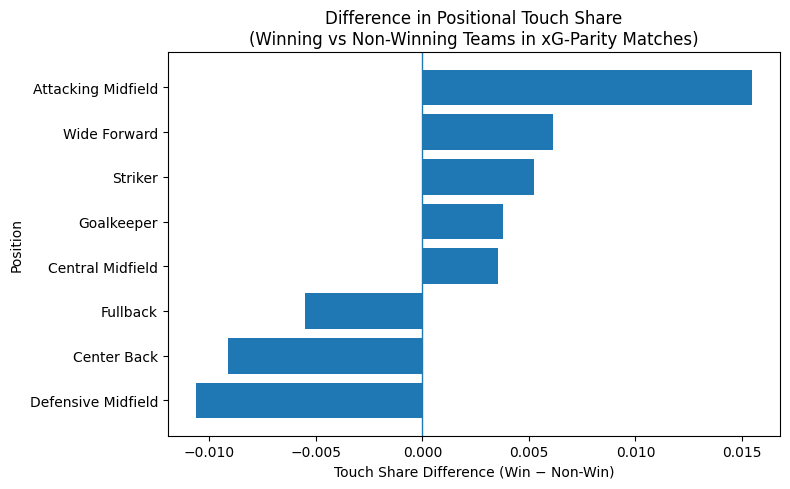

In [64]:
diff = (
    positional_structure_by_outcome
    .sort_values("Win_minus_NonWin")
)

plt.figure(figsize=(8, 5))
plt.barh(
    diff.index,
    diff["Win_minus_NonWin"]
)

plt.axvline(0, linewidth=1)
plt.title("Difference in Positional Touch Share\n(Winning vs Non-Winning Teams in xG-Parity Matches)")
plt.xlabel("Touch Share Difference (Win − Non-Win)")
plt.ylabel("Position")

plt.tight_layout()
plt.show()

The visualization highlights a clear structural shift in possession allocation between winning and
non-winning teams within xG-parity matches. Winning teams consistently devote a greater share of
touches to advanced and connective attacking roles, particularly attacking midfielders and wide
forwards, while non-winning teams retain possession more heavily in defensive midfield and backline
positions.

These patterns emerge despite comparable overall chance quality, suggesting that how possession is
distributed across positions—not just how much chance value is created—may influence match
outcomes in tightly contested games.

### Summary of Possession Structure Findings

Within xG-parity matches, positional touch share analysis reveals consistent structural differences
between winning and non-winning teams. Winning teams allocate possession more heavily to advanced
and connective attacking roles, while non-winning teams retain possession more in deeper defensive
positions. These patterns emerge despite similar overall chance quality, motivating further
analysis of whether such structural configurations represent repeatable “winning shapes.”


## Additional Exploratory Analyses Informing Project Direction

In addition to the primary focus on possession and positional structure within xG-parity matches,
we conducted several supplementary exploratory analyses to better understand the dataset and
evaluate alternative explanatory signals. These explorations informed feature design decisions and
helped rule out spurious or unstable patterns.

**Shot-level and xG distribution analysis** confirmed that individual shot outcomes are highly
variable and heavily right-skewed, reinforcing the decision to analyze match outcomes through
aggregated structures rather than isolated events.

**Event-type and temporal distribution analysis** showed that possession-related actions dominate
match activity, while shots and decisive events occur infrequently. This further motivated the
use of possession-based representations as a stable analytical foundation.

**Preliminary spatial visualizations**, including positional heatmaps and touch distributions by
zone, revealed intuitive structural patterns but did not consistently separate winning from
non-winning teams when considered in isolation. These findings suggested that relative positional
emphasis, rather than absolute spatial concentration, was more informative.

**Early experiments integrating market data and alternative metrics** (e.g., raw possession
percentage, shot counts) did not prove to be fruitful for our analysis.

Full exploratory notebooks and intermediate analyses are available in the `eda/experiments/`
subfolder.

## EDA Summary and Transition to Final Project

This exploratory analysis focused on understanding match outcomes in contexts where expected goals
alone do not clearly separate teams. By conditioning on xG-parity matches and examining possession
structure through positional touch shares, we identified consistent structural differences between
winning and non-winning teams.

Additional exploratory analyses helped rule out alternative explanations and motivated the focus on
positional decomposition rather than coarse aggregate metrics. Together, these findings provide a
clear foundation for the final project, which will extend positional possession metrics and explore
structural archetypes associated with winning outcomes through clustering and interactive
visualization.
